In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
raw_link = pd.read_csv('../Data/postgenerate_gpt.csv')

In [3]:
raw_evaluate = {}

In [4]:
def castString(s):
    s = s.strip().lower()
        
    position1 = s.find('có')
    position2 = s.find('không')

    if position1 != -1 and position2 != -1:
        if position1 <= position2:
            return 'có'
        else:
            return 'không'
        
    if 'có' in s:
        return 'có'
    if 'không' in s:
        return 'không'
    
    if "yes" in s:
        return "có"
    if "no" in s:
        return "không"
    
    return 'không'

In [5]:
def demoPlot(df, name):
    TP = df[df['danhGiaDung']=='không'].shape[0]
    FP = df[df['danhGiaDung']=='có'].shape[0]
    TN = df[df['danhGiaAoGiac']=='có'].shape[0]
    FN = df[df['danhGiaAoGiac']=='không'].shape[0]

    conf_matrix = np.array([[TP, FP],
                            [FN, TN]])

    # Metrics calculation
    accuracy = (TP + TN) / conf_matrix.sum()
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    fig, ax = plt.subplots(figsize=(6, 6))

    # Define stable colors for each cell
    colors = np.array([["#4CAF50",  # TP - green
                        "#F44336"], # FP - red
                    ["#FF9800",  # FN - orange
                        "#2196F3"]]) # TN - blue

    for i in range(2):
        for j in range(2):
            # Draw colored rectangle for each cell
            ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=colors[i, j], alpha=0.7))
            # Put the value on top of colored cell
            ax.text(j, i, str(conf_matrix[i, j]), va='center', ha='center', color='white', fontsize=16, fontweight='bold')

    # Set axis tick labels
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Positive", "Negative"], fontsize=12)
    ax.set_yticklabels(["Positive", "Negative"], fontsize=12)

    # Set axis titles
    ax.set_xlabel("True Class", fontsize=14)
    ax.set_ylabel("Predicted Class", fontsize=14)

    # Add grid lines between cells
    ax.set_xticks(np.arange(-0.5, 2, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 2, 1), minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=2)

    # Hide minor tick marks
    ax.tick_params(which='minor', bottom=False, left=False)

    # Title
    plt.title(name, fontsize=16, pad=20)

    # Display metrics below the plot
    metrics_text = (f"Accuracy: {accuracy:.4f}    "
                    f"Precision: {precision:.4f}    "
                    f"Recall: {recall:.4f}    "
                    f"F1 Score: {f1_score:.4f}")
    plt.figtext(0.5, 0.01, metrics_text, ha='center', fontsize=14, fontweight='bold')

    plt.tight_layout(rect=[0, 0.03, 1, 1])  # leave space for figtext
    plt.show()

    display(TP, FP, FN, TN)

In [6]:
def castCSV(path, model_name, name):
    filePath = path + model_name + "_evaluate"

    raw_evaluate[model_name] = pd.read_csv(f'{filePath}.csv')

    display((raw_evaluate[model_name].link == raw_link.link).sum() - raw_link.shape[0])

#     display(raw_evaluate[model_name].danhGiaDung.value_counts().keys().tolist(), 
#             raw_evaluate[model_name].danhGiaAoGiac.value_counts().keys().tolist())

    raw_evaluate[model_name]['danhGiaDung'] = raw_evaluate[model_name]['danhGiaDung'].apply(castString)
    raw_evaluate[model_name]['danhGiaAoGiac'] = raw_evaluate[model_name]['danhGiaAoGiac'].apply(castString)
    display(raw_evaluate[model_name]['danhGiaDung'].value_counts(),
            raw_evaluate[model_name]['danhGiaAoGiac'].value_counts())
    
    demoPlot(raw_evaluate[model_name], name)

np.int64(0)

danhGiaDung
không    2046
có       1671
Name: count, dtype: int64

danhGiaAoGiac
có       2140
không    1577
Name: count, dtype: int64

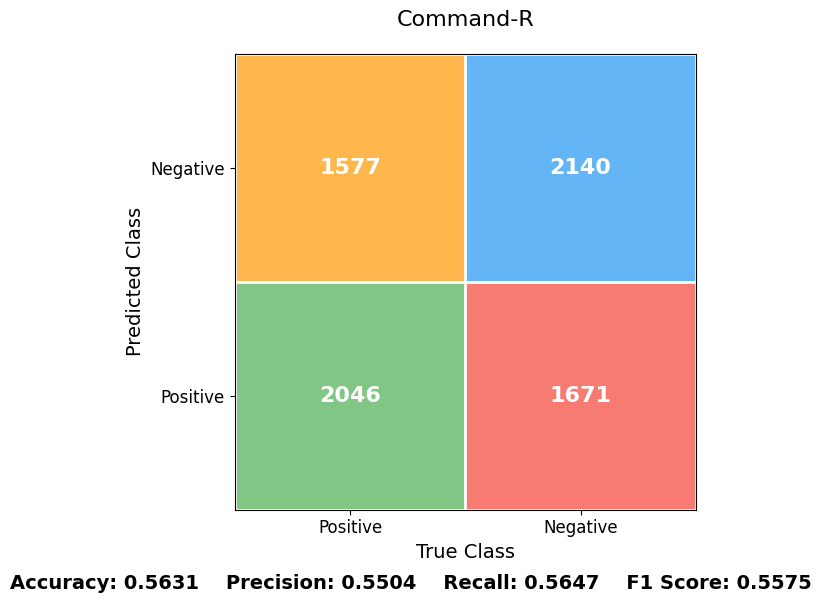

2046

1671

1577

2140

In [7]:
path = "General_support/"

model_name = "c4ai-command-r7b-12-2024-abliterated"

name = "Command-R"

castCSV(path, model_name, name)


np.int64(0)

danhGiaDung
có       2817
không     900
Name: count, dtype: int64

danhGiaAoGiac
có       3046
không     671
Name: count, dtype: int64

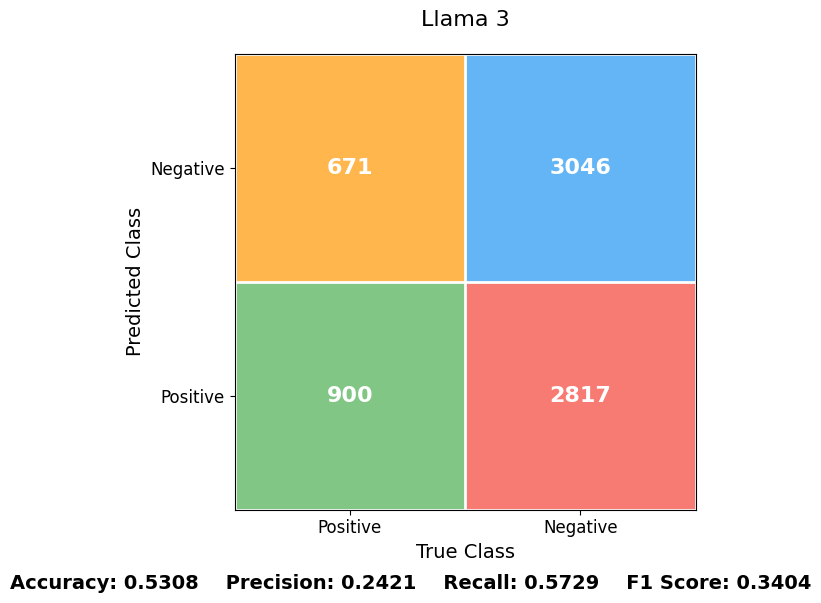

900

2817

671

3046

In [8]:
path = "General_support/"

model_name = "llama-3-7b"

name = "Llama 3"

castCSV(path, model_name, name)

np.int64(0)

danhGiaDung
có       2048
không    1669
Name: count, dtype: int64

danhGiaAoGiac
có       1895
không    1822
Name: count, dtype: int64

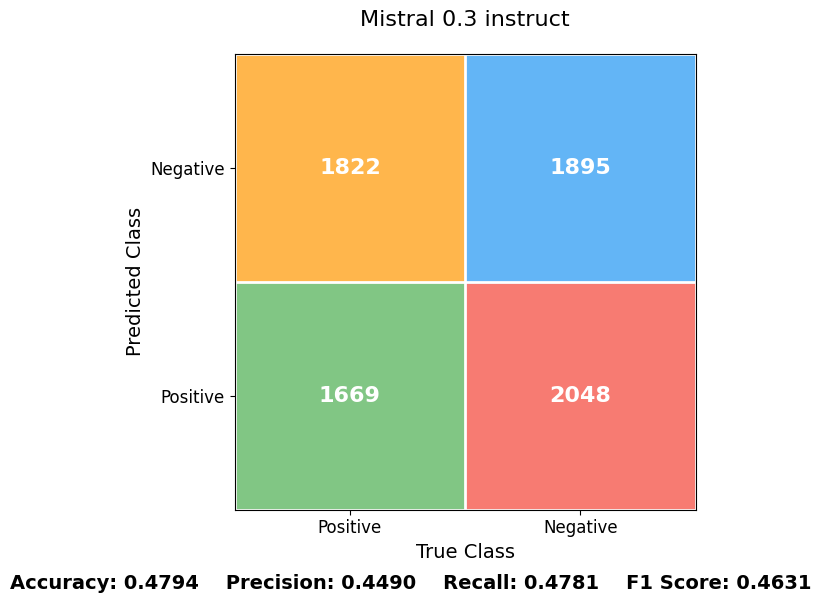

1669

2048

1822

1895

In [9]:
path = "General_support/"

model_name = "mistral-7b-instruct-v0.3"

name = "Mistral 0.3 instruct"

castCSV(path, model_name, name)

np.int64(0)

danhGiaDung
có       3164
không     553
Name: count, dtype: int64

danhGiaAoGiac
có       3348
không     369
Name: count, dtype: int64

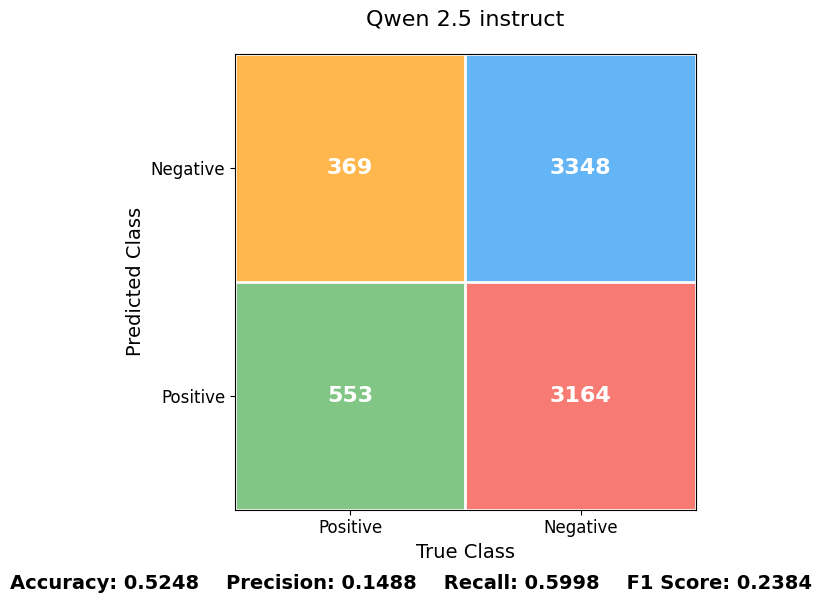

553

3164

369

3348

In [10]:
path = "General_support/"

model_name = "qwen2.5-7b-instruct-1m"

name = "Qwen 2.5 instruct"

castCSV(path, model_name, name)

np.int64(0)

danhGiaDung
có       3669
không      48
Name: count, dtype: int64

danhGiaAoGiac
có       3710
không       7
Name: count, dtype: int64

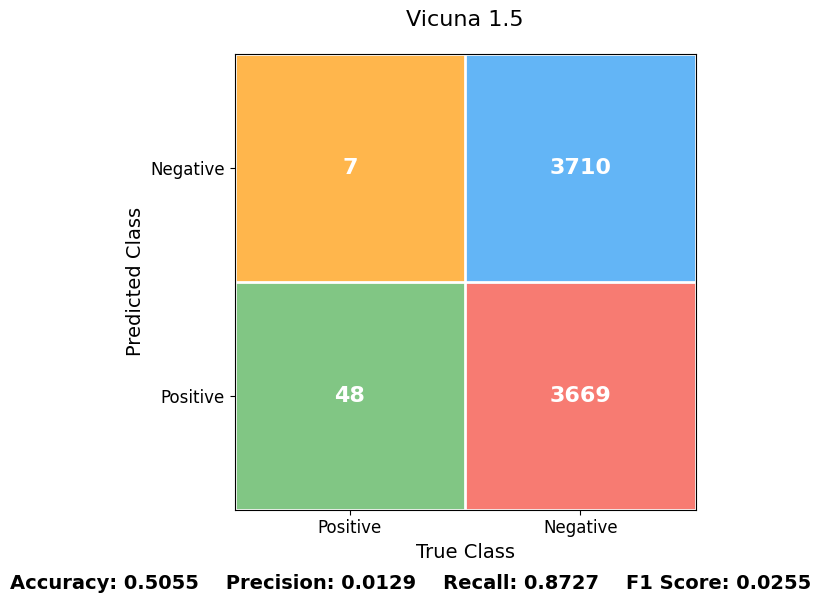

48

3669

7

3710

In [11]:
path = "General_support/"

model_name = "vicuna-7b-v1.5"

name = "Vicuna 1.5"

castCSV(path, model_name, name)

np.int64(0)

danhGiaDung
có       2786
không     931
Name: count, dtype: int64

danhGiaAoGiac
có       2977
không     740
Name: count, dtype: int64

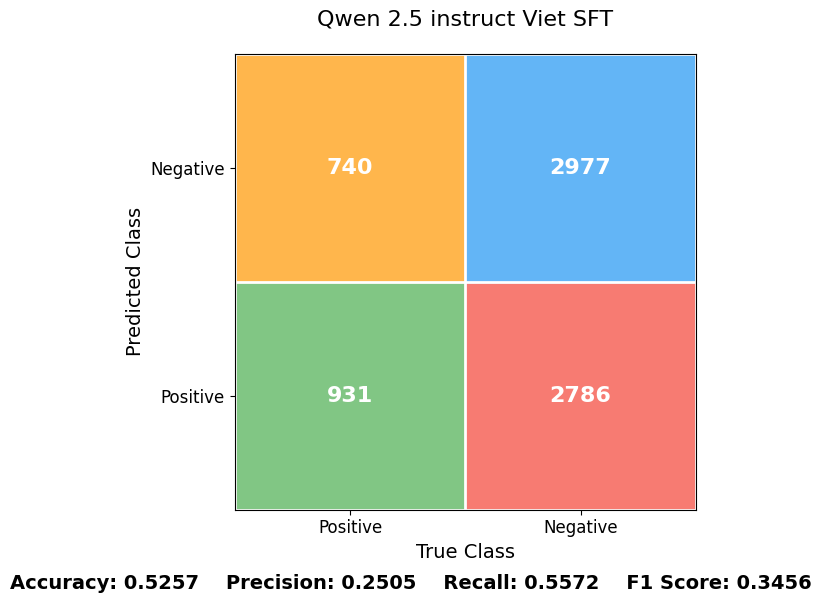

931

2786

740

2977

In [12]:
path = "Vietnamese_support/"

model_name = "qwen2.5-7b-instruct-viet-sft"

name = "Qwen 2.5 instruct Viet SFT"

castCSV(path, model_name, name)

np.int64(0)

danhGiaDung
không    3554
có        163
Name: count, dtype: int64

danhGiaAoGiac
không    3530
có        187
Name: count, dtype: int64

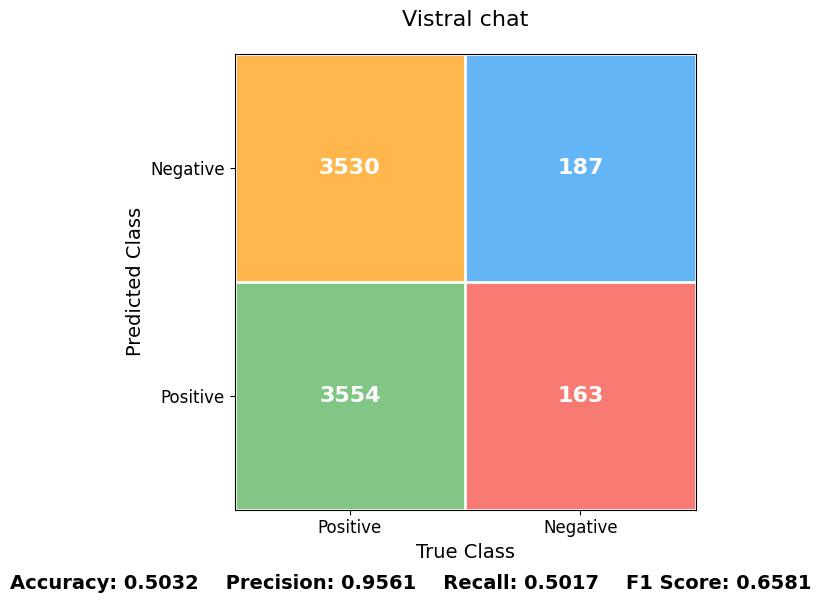

3554

163

3530

187

In [13]:
path = "Vietnamese_support/"

model_name = "vistral-7b-chat"

name = "Vistral chat"

castCSV(path, model_name, name)

np.int64(0)

danhGiaDung
không    2852
có        865
Name: count, dtype: int64

danhGiaAoGiac
không    2262
có       1455
Name: count, dtype: int64

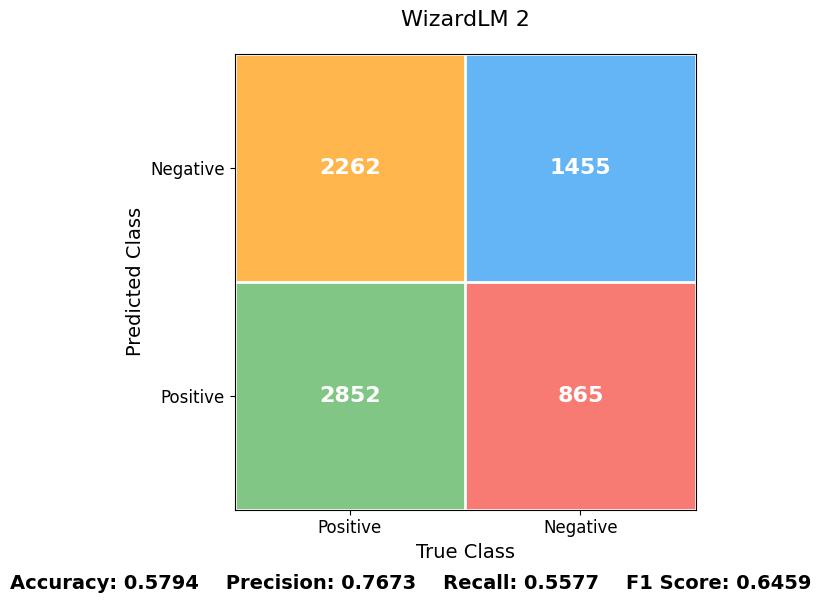

2852

865

2262

1455

In [14]:
path = "General_support/"

model_name = "wizardlm-2-7b"

name = "WizardLM 2"

castCSV(path, model_name, name)
